## 2.A Deteksi ≥ 2 anomali

In [2]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data
df = pd.read_csv("C:/Users/User/Downloads/Datascientist/data/e_commerce_transactions.csv")

In [4]:
df

,order_id,customer_id,order_date,payment_value,decoy_flag,decoy_noise
0,101000,684,2024-01-29,38.93,A,39.51
1,101001,207,2024-06-29,59.52,B,38.97
2,101002,288,2024-03-20,355.52,B,338.14
3,101003,571,2024-02-24,157.65,C,121.69
4,101004,871,2024-01-11,287.68,C,254.92
...,...,...,...,...,...,...
9995,110995,271,2024-04-26,51.02,C,38.61
9996,110996,69,2024-05-16,186.42,A,154.21
9997,110997,974,2024-06-24,62.18,A,71.53
9998,110998,457,2024-01-31,74.09,B,58.13


In [5]:
# Tambahkan kolom selisih absolut antara payment_value dan decoy_noise
df['noise_gap'] = (df['payment_value'] - df['decoy_noise']).abs()

In [9]:
df['noise_gap']

0        0.58
1       20.55
2       17.38
3       35.96
4       32.76
        ...  
9995    12.41
9996    32.21
9997     9.35
9998    15.96
9999    15.35
Name: noise_gap, Length: 10000, dtype: float64

In [7]:
# Distribusi nilai decoy_flag
print("\nDistribusi decoy_flag:\n", df['decoy_flag'].value_counts())


Distribusi decoy_flag:
 decoy_flag
C    4936
B    2519
A    1486
D    1059
Name: count, dtype: int64


In [8]:
# Rata-rata decoy_noise berdasarkan decoy_flag
avg_noise = df.groupby('decoy_flag')['decoy_noise'].mean().sort_values(ascending=False)
print("\nRata-rata decoy_noise per decoy_flag:\n", avg_noise)


Rata-rata decoy_noise per decoy_flag:
 decoy_flag
C    202.779891
B    201.592517
D    198.250066
A    196.769502
Name: decoy_noise, dtype: float64


In [15]:
# Temukan anomali besar: noise_gap > 3000
anomalies = df[df['noise_gap'] > 3000]
print("\nNoise_gap > 3000:\n", anomalies[['customer_id', 'payment_value', 'decoy_noise', 'noise_gap', 'decoy_flag']].head())


Noise_gap > 3000:
 Empty DataFrame
Columns: [customer_id, payment_value, decoy_noise, noise_gap, decoy_flag]
Index: []


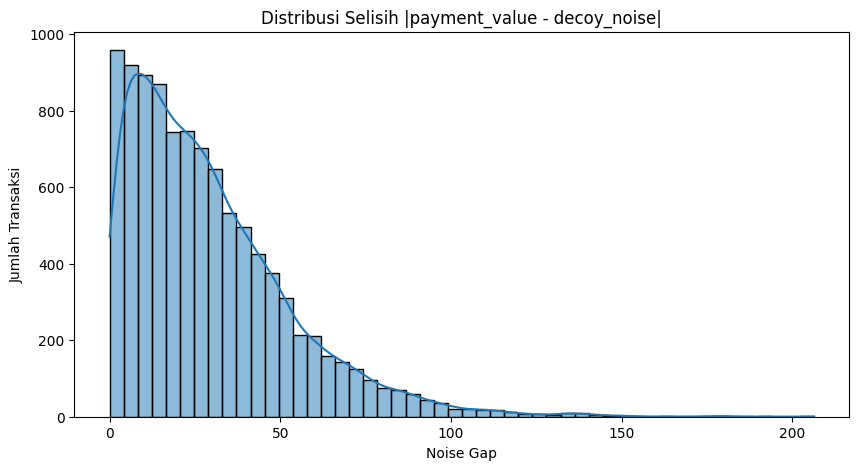

In [11]:
# Visualisasi distribusi noise_gap
plt.figure(figsize=(10, 5))
sns.histplot(df['noise_gap'], bins=50, kde=True)
plt.title('Distribusi Selisih |payment_value - decoy_noise|')
plt.xlabel('Noise Gap')
plt.ylabel('Jumlah Transaksi')
plt.show()

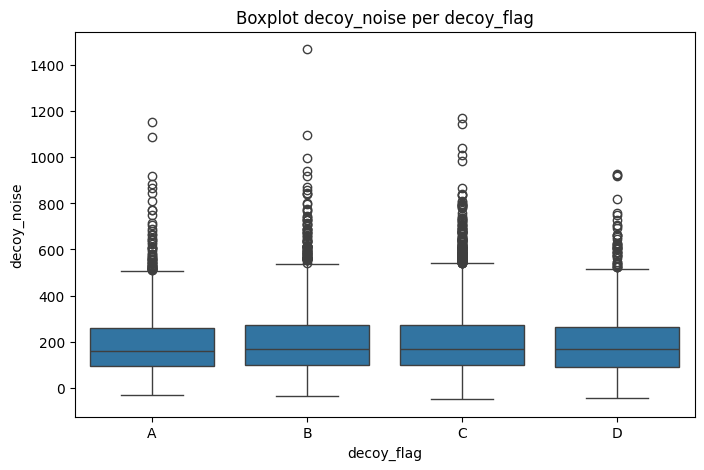

In [12]:
# Visualisasi boxplot decoy_noise per flag
plt.figure(figsize=(8, 5))
sns.boxplot(x='decoy_flag', y='decoy_noise', data=df)
plt.title('Boxplot decoy_noise per decoy_flag')
plt.xlabel('decoy_flag')
plt.ylabel('decoy_noise')
plt.show()